--- 
<strong> 
    <h1 align='center'>Seaborn - Grid Plots</h1> 
</strong>

---

# **Grids**

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

## Imports

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_theme(style='whitegrid')
#plt.style.use('ggplot') # style
%matplotlib inline

In [52]:
iris = sns.load_dataset('iris')

In [53]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print(iris.shape)
print('--------------------------------------------')
print(iris.isna().sum())
print('--------------------------------------------')
print(iris.info())
print('--------------------------------------------')
print(iris.describe())

(150, 5)
--------------------------------------------
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
--------------------------------------------
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     

In [ ]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

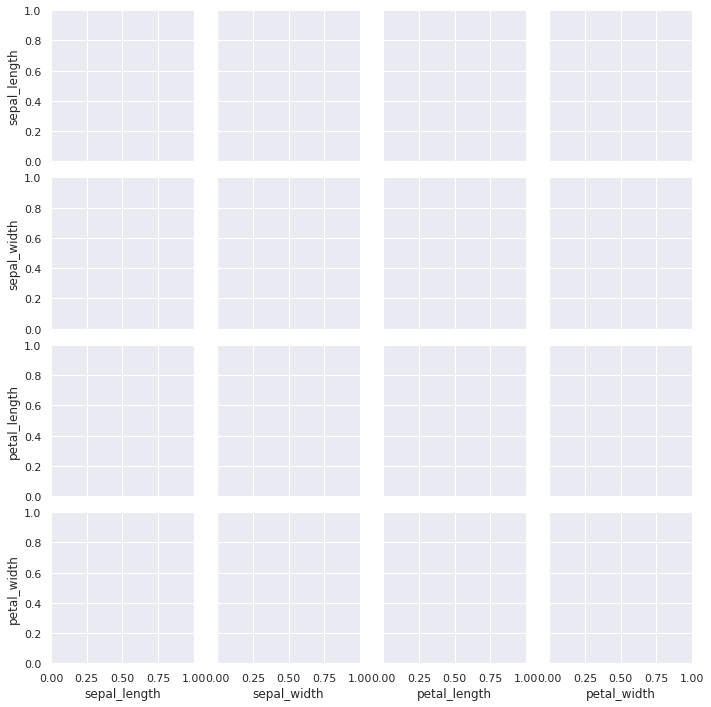

In [ ]:
# sepal_length-->float64
# sepal_width-->float64
# petal_length-->float64
# petal_width-->float64
# species-->object 

sns.set_theme()
# Just the Grid
sns.PairGrid(iris)

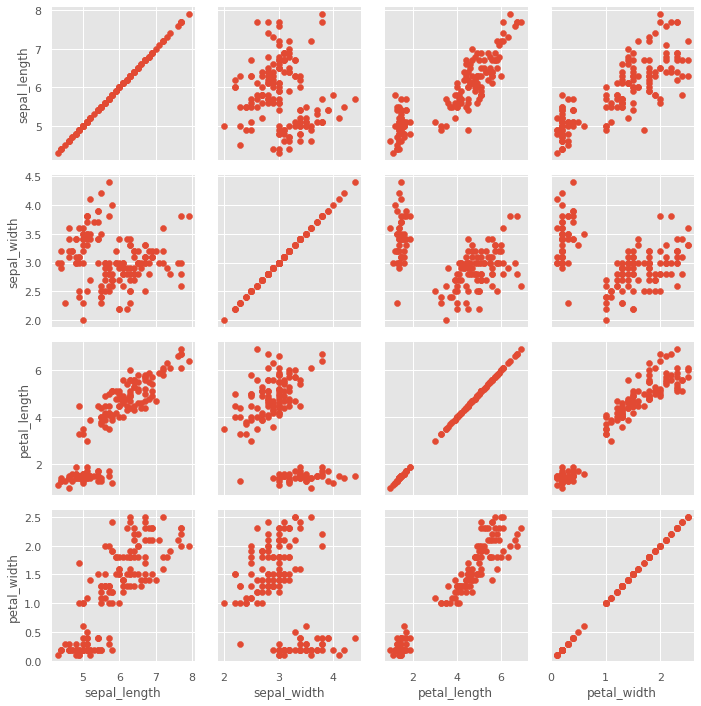

In [ ]:
# Then you map to the grid
plt.style.use('ggplot')
g = sns.PairGrid(iris)
g.map(plt.scatter)

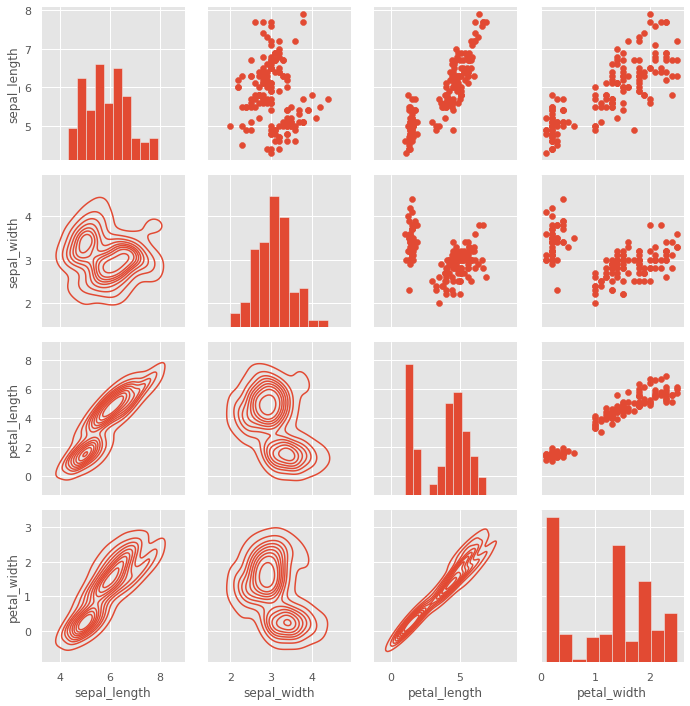

In [ ]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## **pairplot**

pairplot is a simpler version of PairGrid (you'll use quite often)

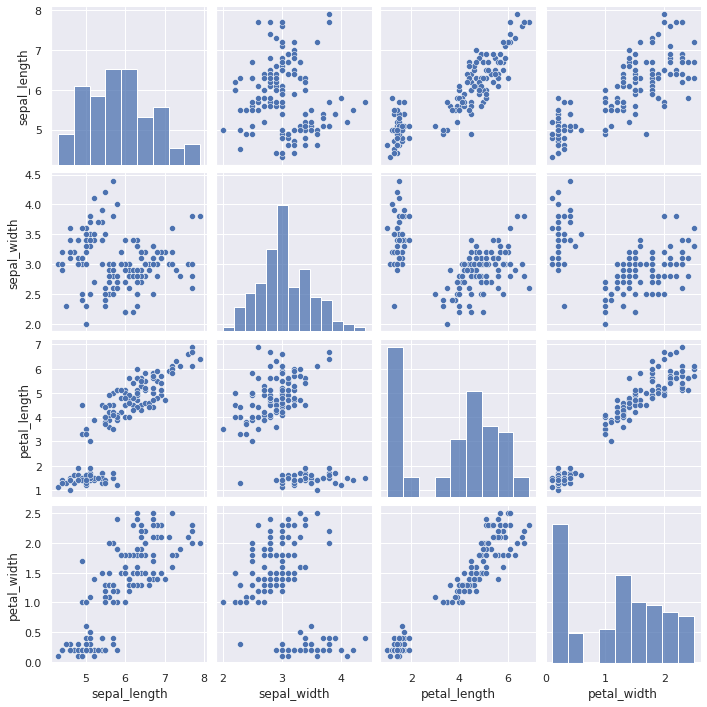

In [ ]:
sns.set_theme()
sns.pairplot(iris)

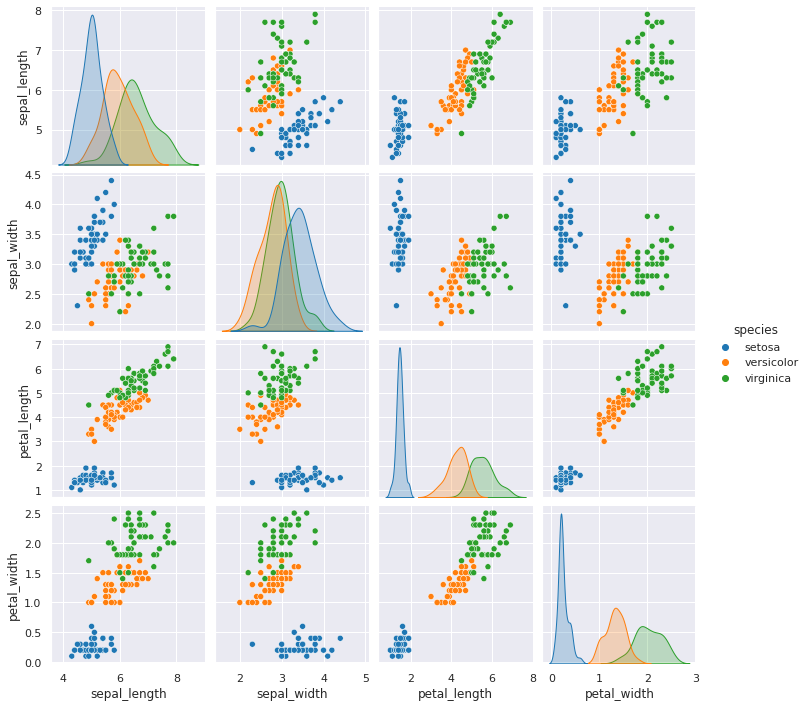

In [ ]:
sns.set_theme()
sns.pairplot(iris, hue='species', palette='tab10') # Species divided into 3 category

## **Facet Grid**

FacetGrid is the general way to create grids of plots based off of a feature:

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


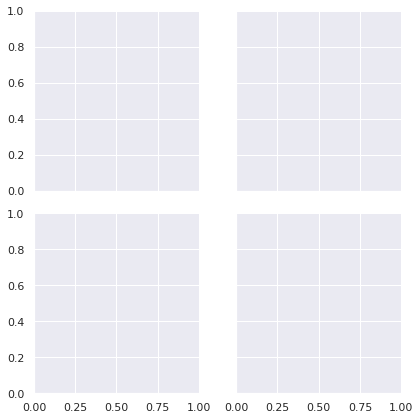

In [ ]:
# Just the Grid
g = sns.FacetGrid(row="smoker", col="time", data=tips)

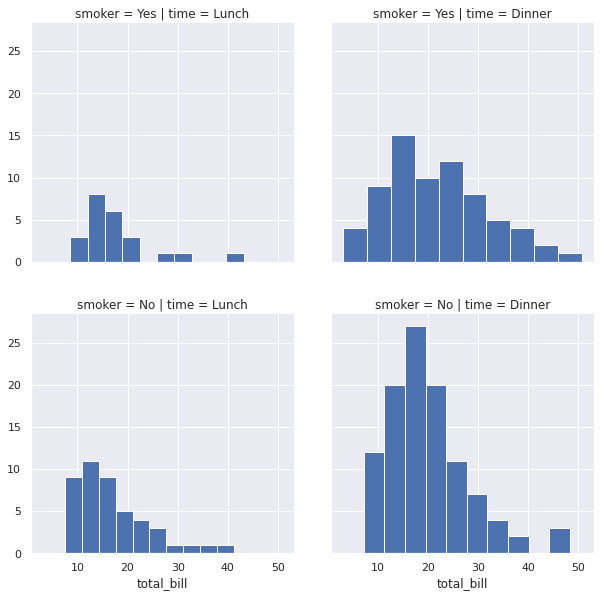

In [ ]:
# total_bill--float64 
# tip--float64 

# sex--category
# smoker--category
# day--category
# time--category

# size--int64 

g = sns.FacetGrid(row="smoker", col="time", data=tips)
g = g.map(plt.hist, "total_bill")
g.fig.set_figwidth(9)
g.fig.set_figheight(9)

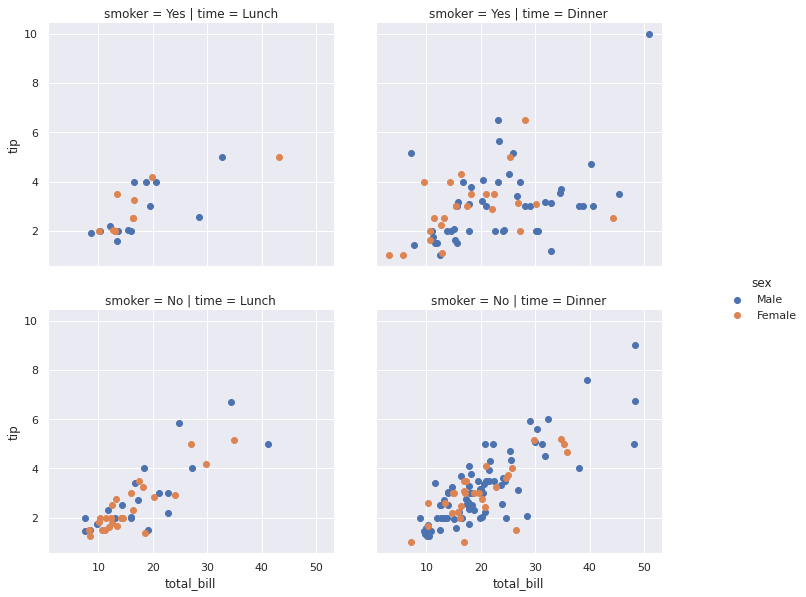

In [ ]:
sns.set_style()
g = sns.FacetGrid(row="smoker", col="time", data=tips, hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()
g.fig.set_figwidth(12)
g.fig.set_figheight(9)

## **JointGrid**

JointGrid is the general version for `jointplot()` type grids, for a quick example:

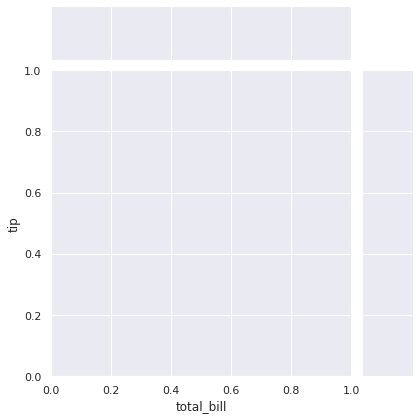

In [ ]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


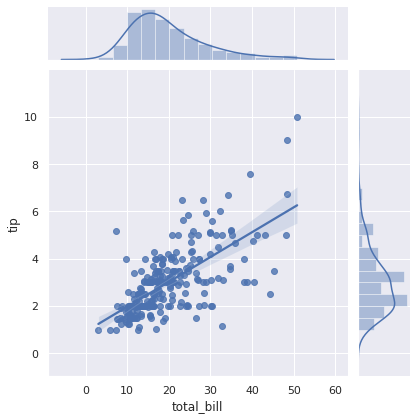

In [ ]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)